In [2]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/EY8Apr2024-AI-Batch2/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


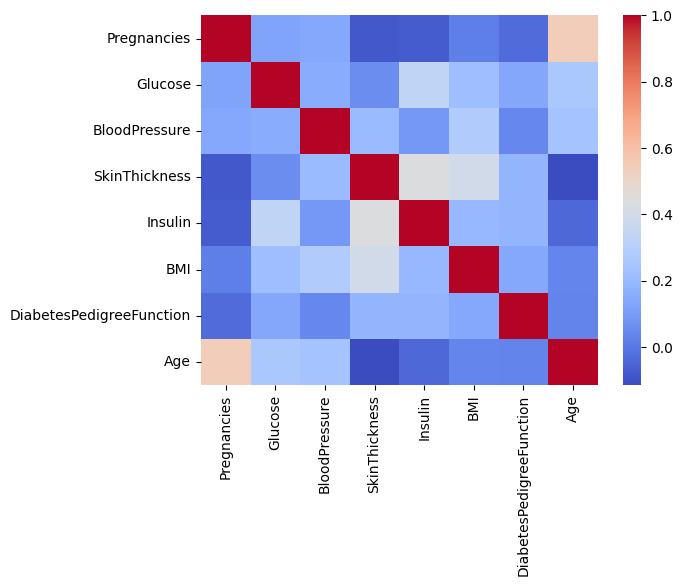

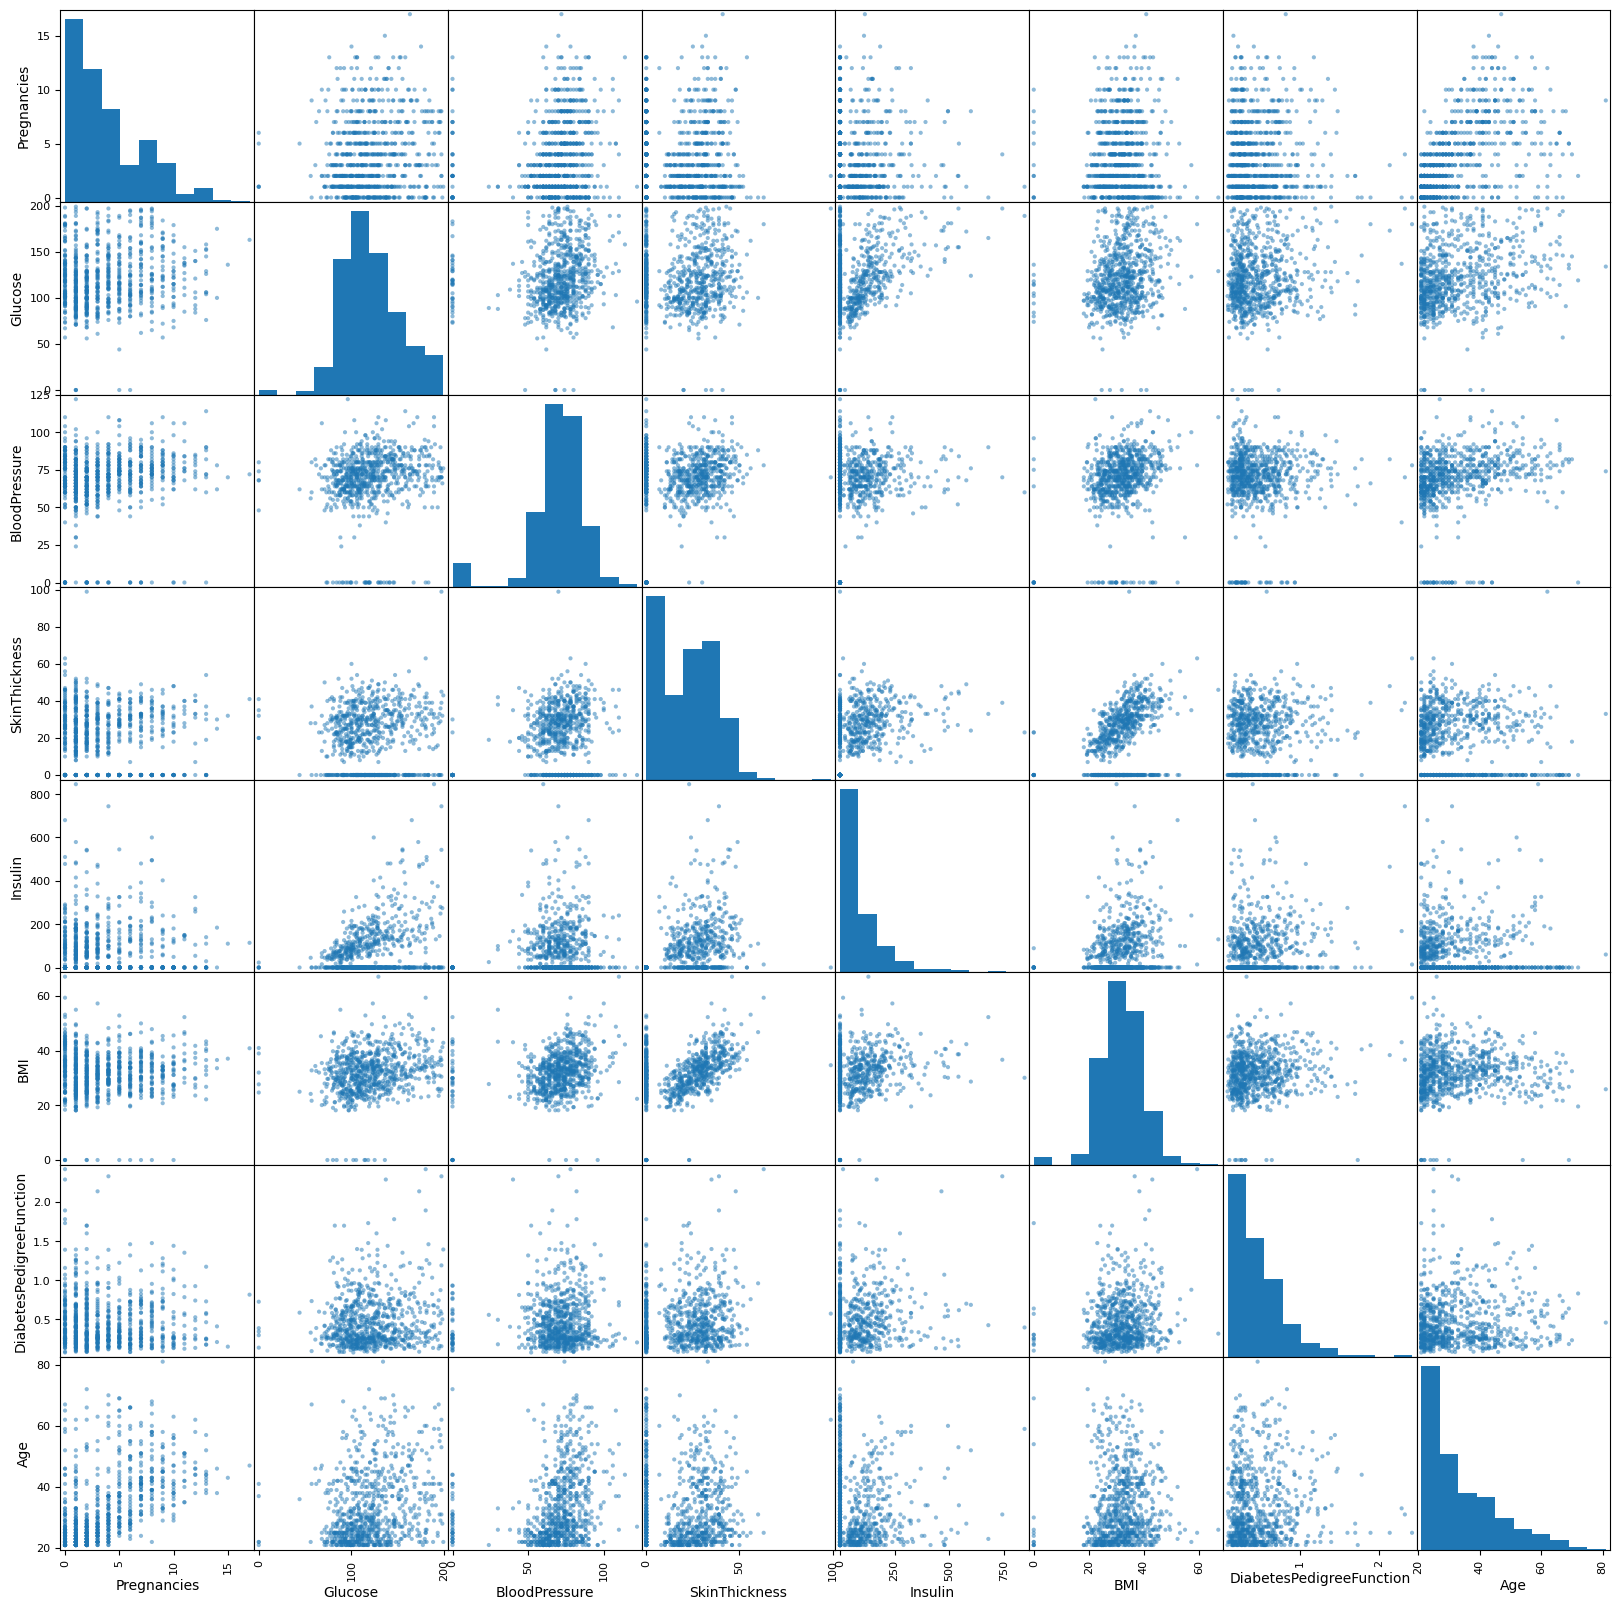

In [3]:
y = data['Outcome']
x = data.iloc[:, :-1]
x.head()
all_col_names = list(x.columns)
# easier to look at!

numbers_only = x.loc[:, all_col_names]
cors = numbers_only.corr()
cors

import seaborn as sns
sns.heatmap(cors, cmap = 'coolwarm')
sm = pd.plotting.scatter_matrix(numbers_only, figsize=(20,20))

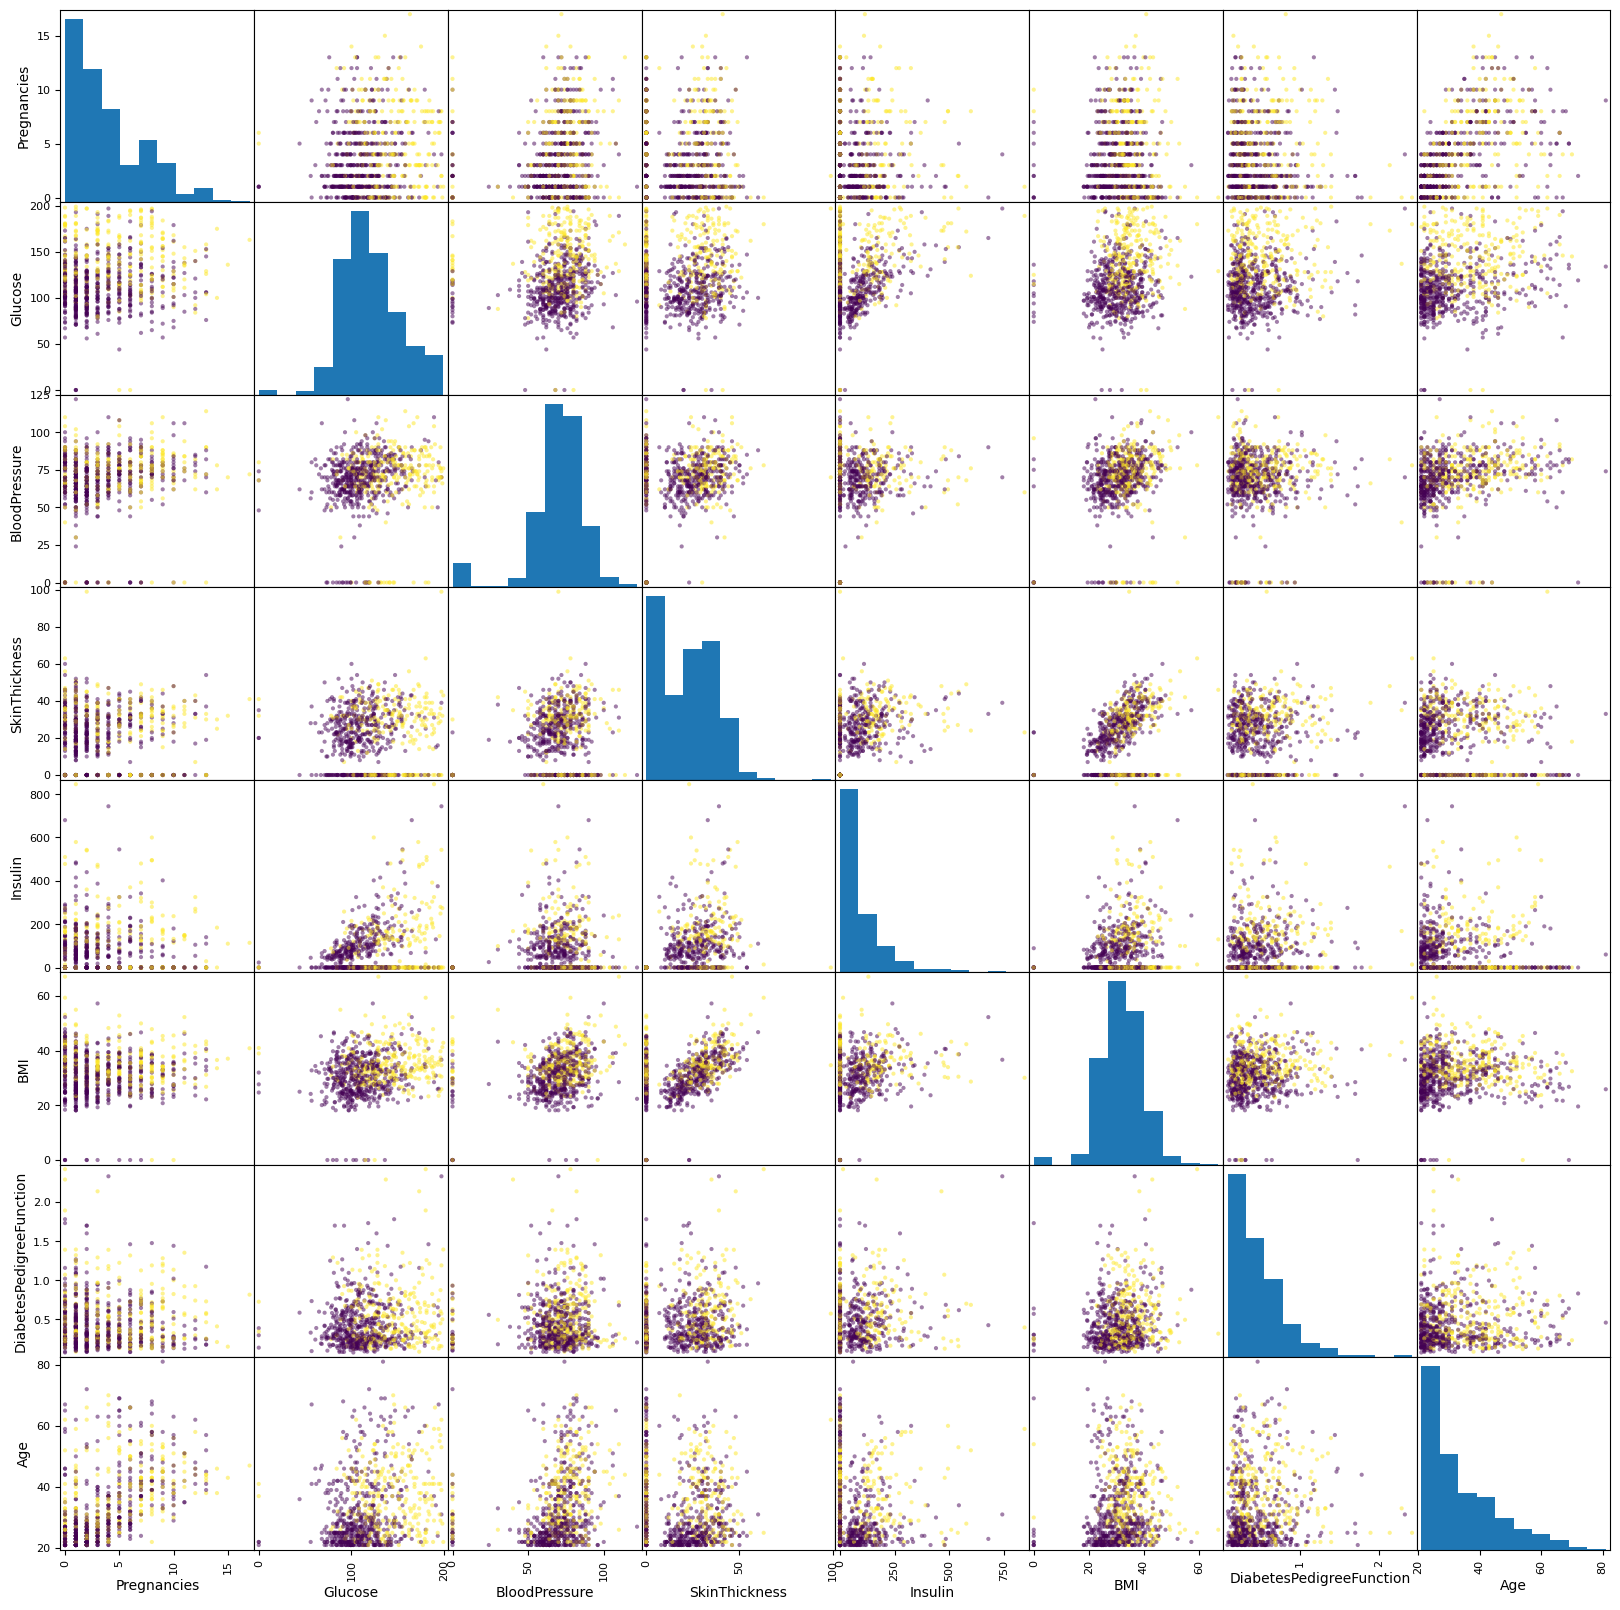

In [4]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

sm = pd.plotting.scatter_matrix(numbers_only, c=y, figsize=(20,20))

In [5]:
xtrain.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
268,0,102,52,0,0,25.1,0.078,21
688,1,140,74,26,180,24.1,0.828,23
305,2,120,76,37,105,39.7,0.215,29
100,1,163,72,0,0,39.0,1.222,33
711,5,126,78,27,22,29.6,0.439,40


In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain, ytrain)

predictions = model.predict(xtest)
predictions.min(), predictions.max()

threshold = ( predictions.max() + predictions.min()) / 2
threshold

binary_logic = lambda val: 1 if val > threshold else 0
p = [ binary_logic(prediction) for prediction in predictions]
p[:5]

ytest[:5]

651    0
575    0
521    0
141    0
507    0
Name: Outcome, dtype: int64

In [10]:
#threshold
#predictions
xtest
predictions

array([ 0.29442538,  0.35480092,  0.31482149,  0.38471466,  0.30068937,
        0.43406514,  0.3583123 ,  0.59318318,  0.17926446, -0.12989495,
        0.27041899,  0.37477442,  0.20025822,  0.62190512,  0.39979917,
        0.43770449,  0.93918046,  0.24328692,  0.49613138,  0.32828949,
       -0.2629286 ,  0.201522  ,  0.37968735,  0.15956168,  0.48671136,
        0.48954309,  0.30427709,  0.38854165, -0.01805259,  0.64407196,
        0.69236075,  0.37154378,  0.07209394,  0.60969174,  0.39005229,
        0.37344802,  0.57378984,  0.6066507 ,  0.37626712,  0.29591199,
        0.17647427,  0.44796982,  0.08038239,  0.98556582,  0.38983736,
        0.70751853,  0.95093897,  0.41275349, -0.04066475,  0.65616132,
        0.22409694,  0.2721611 ,  0.04365733, -0.06996337,  0.85289854,
       -0.11912675,  0.27234235,  0.07135226,  0.34616249,  0.38251466,
        0.47100801,  0.14025013,  0.81213823,  0.16510287,  0.45710676,
        0.50747413,  0.74492544,  0.40510649,  0.00298536,  0.12

In [11]:
from sklearn.metrics import accuracy_score
ascore = accuracy_score(p, ytest)
print('Linear regression accuracy was ' + str(ascore*100) + '%')

Linear regression accuracy was 72.72727272727273%


In [12]:
xtrain.describe().T

mu = xtrain.describe().T['mean']
sigma = xtrain.describe().T['std']

In [13]:
mu
xtrain_norm = (xtrain - mu) / sigma
xtest_norm = (xtest - mu) / sigma

In [14]:
xtrain_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
268,-1.125059,-0.574686,-0.943258,-1.309996,-0.713343,-0.891384,-1.206242,-1.046621
688,-0.833342,0.611284,0.262869,0.326756,0.839486,-1.018917,1.106857,-0.872042
305,-0.541625,-0.012911,0.372517,1.019227,0.192474,0.970604,-0.783716,-0.348305
100,-0.833342,1.329108,0.153221,-1.309996,-0.713343,0.881331,2.322005,0.000853
711,0.333527,0.174348,0.482165,0.389708,-0.523553,-0.317483,-0.092871,0.611879


In [15]:

xtrain_norm[xtrain_norm > 3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
xtrain_norm.max()

Pregnancies                 3.834132
Glucose                     2.452658
BloodPressure               2.894419
SkinThickness               4.922250
Insulin                     6.584957
BMI                         4.465021
DiabetesPedigreeFunction    6.016796
Age                         4.190749
dtype: float64

In [17]:
# outliers
outliers = (xtrain_norm > 3) | (xtrain_norm < -3)
xtrain_norm['isOutlier'] = outliers.sum(axis=1)
all_outliers = xtrain_norm[xtrain_norm['isOutlier'] > 0]
all_outliers.index

Index([222, 409, 622, 435, 266, 453, 145, 535, 371, 502, 159, 172, 445, 342,
       182, 349, 619,  13, 330, 703,   8, 706,  58, 666, 336, 228, 621,   7,
       430, 153, 459, 177,  75, 697, 247, 593,  88, 261, 673,   9, 484, 468,
       533, 357, 645, 584, 674, 695, 643, 579, 426, 486, 753, 347, 655, 332,
       269, 684,  60],
      dtype='int64')

In [18]:
xtrain_norm_backup = xtrain_norm

In [26]:
for myindex in all_outliers.index:
  for col_name in xtrain_norm.columns:
    datapoint = xtrain_norm.loc[myindex, [col_name]]
    if(datapoint[0] > 3):
      xtrain_norm.loc[myindex, [col_name]] = 3.0

    if( datapoint[0] < -3 ):
      xtrain_norm.loc[myindex, [col_name]] = -3.0

# check again if any outliers are still present
outliers = (xtrain_norm > 3) | (xtrain_norm < -3)
xtrain_norm['isOutlier'] = outliers.sum(axis=1)
all_outliers = xtrain_norm[xtrain_norm['isOutlier'] > 0]
xtrain_norm = xtrain_norm.iloc[:, :-1]
print('Pending outliers = ')
print(all_outliers.index)
xtrain_norm.columns

Pending outliers = 
Index([], dtype='int64')


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [27]:
ytrain

118    0
89     0
68     0
90     0
320    0
      ..
601    0
573    0
617    0
623    0
476    1
Name: Outcome, Length: 614, dtype: int64

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# in case of trees-> we could fluctuate the depth of tree
# in case of ensembles (forests or jungles) -> we could fluctuate no. of trees

# Hyperparameters-> values that we adjust from our side as AI/ML engineers
# -> ASSUMPTIONS from our end
# -> these adjustments result in different models out of same algorithms!

my_algos = {
    "DecisionTree100": DecisionTreeClassifier(max_depth=100),
    "DecisionTree10": DecisionTreeClassifier(max_depth=10),
    "DecisionTree200": DecisionTreeClassifier(max_depth=200),
    "DecisionTree50": DecisionTreeClassifier(max_depth=50),
    "RandomForest10": RandomForestClassifier(n_estimators=10),
    "RandomForest100": RandomForestClassifier(n_estimators=100),
    "RandomForest200": RandomForestClassifier(n_estimators=200),
    "RandomForest300": RandomForestClassifier(n_estimators=300),
    "KNN" : KNeighborsClassifier(),
    "Sherlock" : GaussianNB(),
    "Support Vector Machine with linear" : SVC(kernel='linear'),
    "Support Vector Machines with RBF": SVC(kernel='rbf')
}

In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
best_model_acc = None
best_model_f1 = None
best_model_p = None
best_model_r = None

best_model_name_acc = ""
best_model_name_f1 = ""
best_model_name_p = ""
best_model_name_r = ""

best_acc = -1
best_f1 = -1
best_precision = -1
best_recall = -1


all_accs = []
all_f1_scores = []
all_precions = []
all_recalls = []



In [32]:
for algo_name, algo in my_algos.items():
  print('Algorithm considered = ' + algo_name)
  model = algo
  model.fit(xtrain_norm, ytrain)
  p = model.predict(xtest_norm)
  a_score = accuracy_score(p, ytest)
  p_score = precision_score(p, ytest)
  r_score = recall_score(p, ytest)
  f_score = f1_score(p, ytest)


  all_accs.append(a_score)
  all_f1_scores.append(f_score)
  all_precions.append(p_score)
  all_recalls.append(r_score)
  print('Accuracy = ' + str(a_score))
  print('Precision = ' + str(p_score))
  print('Recall = ' + str(r_score))
  print('F1 Score = ' + str(f_score))


  if a_score == 1.0: # if any model is 100% accurate, its a sign of overfitting
    print('Overfitting')

  else:
    if a_score > best_acc:
      best_acc = a_score
      best_model_acc = algo
      best_model_name_acc = algo_name
    if f_score > best_f1:
      best_f1 = f_score

      best_model_f1 = algo
      best_model_name_f1 = algo_name
    if p_score > best_precision:
      best_precision = p_score
      best_model_p = algo
      best_model_name_p = algo_name
    if r_score > best_recall:
      best_recall = r_score
      best_model_r = algo
      best_model_name_r = algo_name
  print('*************')
  print()

Algorithm considered = DecisionTree100
Accuracy = 0.6688311688311688
Precision = 0.4918032786885246
Recall = 0.6
F1 Score = 0.5405405405405406
*************

Algorithm considered = DecisionTree10
Accuracy = 0.6948051948051948
Precision = 0.5409836065573771
Recall = 0.6346153846153846
F1 Score = 0.5840707964601771
*************

Algorithm considered = DecisionTree200
Accuracy = 0.7012987012987013
Precision = 0.5081967213114754
Recall = 0.6595744680851063
F1 Score = 0.5740740740740742
*************

Algorithm considered = DecisionTree50
Accuracy = 0.7142857142857143
Precision = 0.5081967213114754
Recall = 0.6888888888888889
F1 Score = 0.5849056603773585
*************

Algorithm considered = RandomForest10
Accuracy = 0.7142857142857143
Precision = 0.5737704918032787
Recall = 0.660377358490566
F1 Score = 0.6140350877192982
*************

Algorithm considered = RandomForest100
Accuracy = 0.7272727272727273
Precision = 0.5081967213114754
Recall = 0.7209302325581395
F1 Score = 0.5961538461538

In [33]:
best_model_name_acc

'Support Vector Machine with linear'

In [34]:
best_model_name_f1

'Sherlock'

In [35]:
best_model_name_p

'Sherlock'

In [36]:
dir(best_model_acc)

['C',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_proba',
 '_class_weight',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags',
 '_n_support',
 '_num_iter',
 '_parameter_constraints',
 '_probA',
 '_probB',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse',
 '_sparse_decision_function',
 '_

In [37]:
best_model_acc._get_coef()

array([[ 0.25217791,  0.95020071, -0.13881357, -0.07202002, -0.07673085,
         0.47582093,  0.2390374 ,  0.09397791]])

In [38]:
len(best_model_acc._get_coef()[0]), len(xtrain.columns)

(8, 8)

In [39]:
xtrain.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [41]:
all_coef = best_model_acc._get_coef()[0]
all_columns = xtrain.columns

final_equation = 'diagnosis = '

for i in range(8):
  final_equation = final_equation + str(all_coef[i]) + ' * ' + all_columns[i] + ' + '

final_equation = final_equation + str(best_model_acc._intercept_)
print(final_equation)

f = open('file.model', 'wt')
f.write(final_equation)
f.close()


diagnosis = 0.2521779073801951 * Pregnancies + 0.9502007117048918 * Glucose + -0.13881357441059117 * BloodPressure + -0.07202002143469732 * SkinThickness + -0.07673085419501569 * Insulin + 0.47582093137903897 * BMI + 0.23903739546095537 * DiabetesPedigreeFunction + 0.09397791399641142 * Age + [0.71421604]


In [42]:
import pickle
pickle.dump(best_model_acc, open("model.best", 'wb'))

In [43]:
loaded_model = pickle.load(open("model.best", 'rb'))
result = loaded_model.score(xtest_norm, ytest)
print(result)


0.7727272727272727


In [44]:
loaded_model.predict(xtest_norm)

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])